In [1]:
import os
import re
import matplotlib.pyplot as plt
import pandas as pd

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))

sparc_stats = "sparc2billO3.txt"
arm_stats = "arm2bil.txt"
riscv_stats = "riscv2bilO3.txt"
power_stats = "power2bilO3.txt"
arm_data_file = os.path.join(parent_dir, arm_stats)


feature_name = ["dic", "tick", "committedInsts", "branchMispredicts", "dcacheMiss", "icacheMiss", "l2cacheMiss", "IQFullEvents",
               "LSQFullEvents", "ROBFullEvents", "num_loads", "num_branches", "num_float", "num_integer", "num_function"]

data =  {     "simInsts": [],
              "simTicks": [], 
              "system.cpu.commit.numCommittedDist::total": [], 
              "system.cpu.commit.branchMispredicts": [],
              "system.cpu.dcache.overallMisses::total": [],
              "system.cpu.fetch.icacheSquashes": [],
              "system.cpu.icache.overallMisses::total": [],
              "system.cpu.rename.IQFullEvents": [],
              "system.cpu.iew.lsqFullEvents": [],
              "system.cpu.rename.ROBFullEvents": [],
              "system.cpu.MemDepUnit__0.insertedLoads": [],
              "system.cpu.executeStats0.numBranches": [],
              "system.cpu.commitStats0.numFpInsts": [],
              "system.cpu.commitStats0.numIntInsts": [],
              "system.cpu.commit.functionCalls": [] }

with open(arm_data_file, 'r') as file:
    for cur_line in file:
        strarr = re.split(r'\s+',cur_line)[:2]
        if strarr[0] in data:
            data[strarr[0]].append(int(strarr[1]))



In [2]:
data = pd.DataFrame(data)               # Converting to dataframe
data.columns = feature_name             # Renaming the attributes name
dim = data.shape

print(data.head())

# Check if any value is NaN
if data.isna().any().any():
   print("There are NaN values in the DataFrame.")
else:
   print("There are no NaN values in the DataFrame.")

        dic         tick  committedInsts  branchMispredicts  dcacheMiss  \
0  10000001   2346762000         4554301              17430        2449   
1  20000001   4655992500         9081800              34371        2449   
2  30000001   6965686000        13610138              51373        2449   
3  40000002   9274929000        18137719              68341        2449   
4  50000005  11584298000        22665462              85355        2449   

   icacheMiss  l2cacheMiss  IQFullEvents  LSQFullEvents  ROBFullEvents  \
0        5016        25869        238815             33           3099   
1        9449        51121        473006             33           6237   
2       13895        76371        707150             33           9371   
3       18392       101531        945954             33          12500   
4       22853       126759       1180178             33          15638   

   num_loads  num_branches  num_float  num_integer  num_function  
0    2107024       1521595          0

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

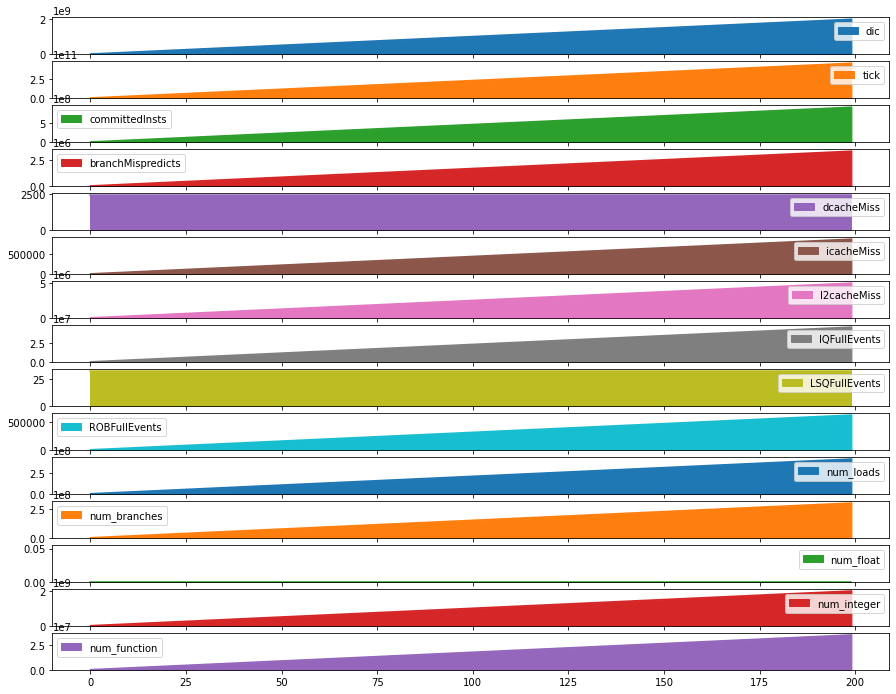

In [3]:
data.plot.area(figsize=(15,12), subplots=True)

<Figure size 1440x1008 with 0 Axes>

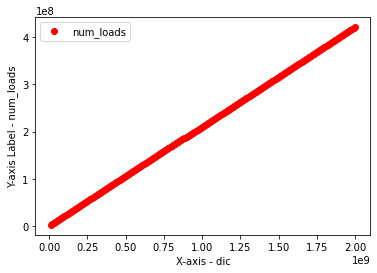

In [4]:
# Plotting a graph between columns 'X' and 'Y'
xa = "dic"
ya = "num_loads"
plt.figure(figsize=(20, 14))
data.plot(x=xa, y=ya, kind='line', marker='o', color='red', linestyle='-', linewidth=0)

# Adding labels and title
plt.xlabel(f'X-axis - {xa}')
plt.ylabel(f'Y-axis Label - {ya}')

# Display the plot
plt.show()